Import packages

In [78]:
import pandas as pd
from sqlalchemy import create_engine
pd.options.display.float_format = '{:,.1f}'.format

Create pointer to database

In [79]:
engine = create_engine("postgresql:///opportunity_youth")

In [80]:
df_oy = pd.read_sql(sql="SELECT * FROM table_final_query_1", con=engine)
df_oy

,pop,age_group,est,total,pct
0,oy_yes,16-18,"1,815.0","30,141.0",6.0
1,oy_no,16-18,"27,877.0","30,141.0",92.5
2,working w/o a diploma,16-18,449.0,"30,141.0",1.5
3,oy_yes,19-21,"3,902.0","25,486.0",15.3
4,oy_no,19-21,"20,184.0","25,486.0",79.2
5,working w/o a diploma,19-21,"1,400.0","25,486.0",5.5
6,oy_no,22-24,"23,781.0","30,256.0",78.6
7,working w/o a diploma,22-24,"1,578.0","30,256.0",5.2
8,oy_yes,22-24,"4,897.0","30,256.0",16.2


In [81]:
df_oy_new = df_oy.pivot(index='pop', columns='age_group', values=['est','total','pct'])
df_oy_new

est                      total                    \
age_group                16-18    19-21    22-24    16-18    19-21    22-24   
pop                                                                           
oy_no                 27,877.0 20,184.0 23,781.0 30,141.0 25,486.0 30,256.0   
oy_yes                 1,815.0  3,902.0  4,897.0 30,141.0 25,486.0 30,256.0   
working w/o a diploma    449.0  1,400.0  1,578.0 30,141.0 25,486.0 30,256.0   

                        pct              
age_group             16-18 19-21 22-24  
pop                                      
oy_no                  92.5  79.2  78.6  
oy_yes                  6.0  15.3  16.2  
working w/o a diploma   1.5   5.5   5.2

In [82]:
df_oy_new.rename(index={'oy_no':'Not an Opportunity Youth', 'oy_yes':'Opportunity Youth','working w/o a diploma':'Working without a diploma'})

est                      total           \
age_group                    16-18    19-21    22-24    16-18    19-21   
pop                                                                      
Not an Opportunity Youth  27,877.0 20,184.0 23,781.0 30,141.0 25,486.0   
Opportunity Youth          1,815.0  3,902.0  4,897.0 30,141.0 25,486.0   
Working without a diploma    449.0  1,400.0  1,578.0 30,141.0 25,486.0   

                                     pct              
age_group                    22-24 16-18 19-21 22-24  
pop                                                   
Not an Opportunity Youth  30,256.0  92.5  79.2  78.6  
Opportunity Youth         30,256.0   6.0  15.3  16.2  
Working without a diploma 30,256.0   1.5   5.5   5.2

In [246]:
df_oy_pct = df_oy_new['pct']
df_oy_pct

age_group,16-18,19-21,22-24
pop,,,
oy_no,92.5,79.2,78.6
oy_yes,6.0,15.3,16.2
working w/o a diploma,1.5,5.5,5.2


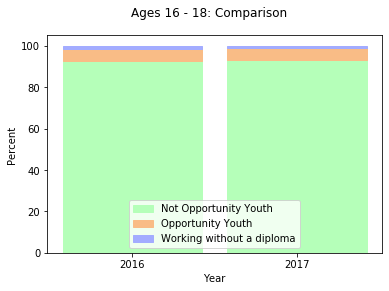

In [114]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data = {'greenBars': [df_oy_pct.loc['oy_no', '16-18'], 93], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '16-18'], 6],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','16-18'], 1]
           }

df = pd.DataFrame(raw_data)

# # From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('2016','2017')

# Create green Bars
p1 = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
# Create orange Bars
p2 = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
# Create blue Bars
p3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.suptitle("Ages 16 - 18: Comparison")
 
# Show graphic

plt.legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower center')
plt.show()


In [115]:
df_oy_new['Totals'] = df_oy_new.sum(axis=1)
df_oy_new.to_csv("data/processed/OY_Status_by_Age.csv", index=True)

In [116]:
df_oy_new.to_excel("data/processed/OY_Status_by_Age.xlsx")

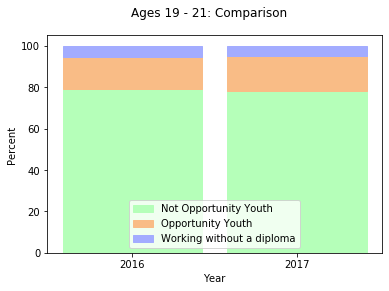

In [118]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data = {'greenBars': [df_oy_pct.loc['oy_no', '19-21'], 78], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '19-21'], 17],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','19-21'], 5]
           }

df = pd.DataFrame(raw_data)

# # From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('2016','2017')

# Create green Bars
p1 = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
# Create orange Bars
p2 = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
# Create blue Bars
p3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.suptitle("Ages 19 - 21: Comparison")
 
# Show graphic

plt.legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower center')
plt.show()


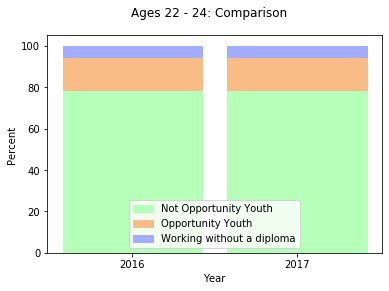

In [133]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data = {'greenBars': [df_oy_pct.loc['oy_no', '22-24'], 78.5], 
            'orangeBars': [df_oy_pct.loc['oy_yes', '22-24'], 16],
            'blueBars': [df_oy_pct.loc['working w/o a diploma','22-24'], 5.5]
           }

df = pd.DataFrame(raw_data)

# # From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

barWidth = 0.85
names = ('2016','2017')

# Create green Bars
p1 = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
# Create orange Bars
p2 = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
# Create blue Bars
p3 = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.suptitle("Ages 22 - 24: Comparison")
plt.legend((p1[0], p2[0], p3[0]), 
           ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), 
           loc='lower center') 

# Show graphic
plt.show()


In [134]:
df_oy_est = df_oy_new['est']
df_oy_est

age_group,16-18,19-21,22-24
pop,,,
oy_no,"27,877.0","20,184.0","23,781.0"
oy_yes,"1,815.0","3,902.0","4,897.0"
working w/o a diploma,449.0,"1,400.0","1,578.0"


## Raw numbers

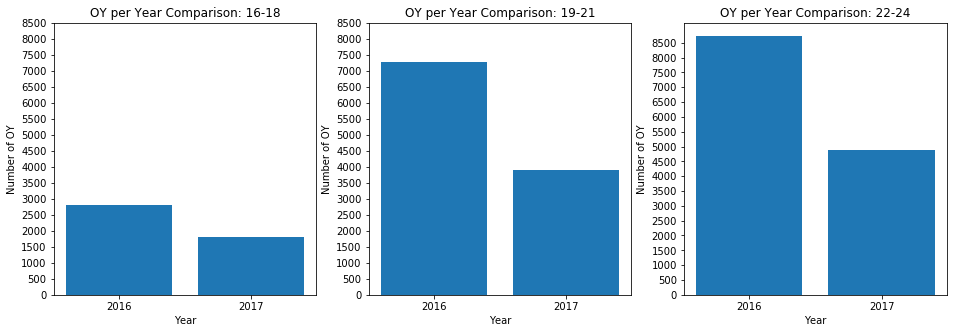

In [241]:
x = np.arange(2)
y1 = [2805, df_oy_est.loc['oy_yes', '16-18']]
y2 = [7284, df_oy_est.loc['oy_yes', '19-21']]
y3 = [8728, df_oy_est.loc['oy_yes', '22-24']]
y = [y1, y2, y3]
t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
ax[0], ax[1], ax[2] = ax.flatten()
for i in np.arange(3):
    ax[i].bar(x, y[i])
    ax[i].set_xticks([0,1])
    ax[i].set_yticks(np.arange(0,9000,500))
    ax[i].set_xticklabels(['2016','2017'])
    ax[i].set_title(t[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Number of OY')


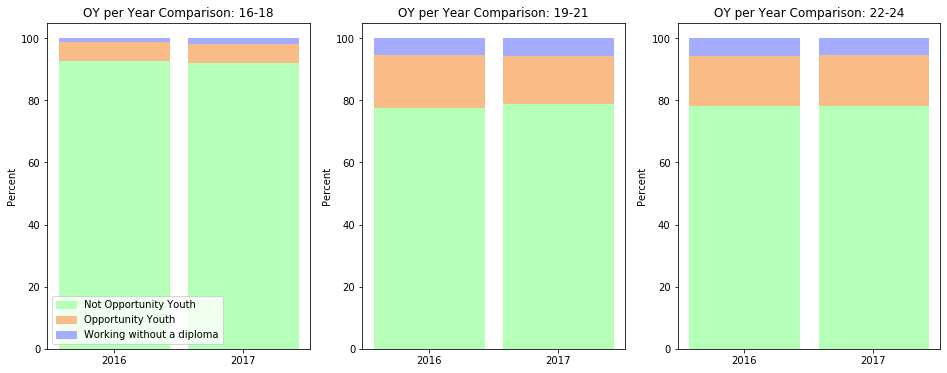

In [245]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data_1 = {'greenBars': [93, df_oy_pct.loc['oy_no', '16-18']], 
            'orangeBars': [6, df_oy_pct.loc['oy_yes', '16-18']],
            'blueBars': [1, df_oy_pct.loc['working w/o a diploma','16-18']]
           }

raw_data_2 = {'greenBars': [78, df_oy_pct.loc['oy_no', '19-21']], 
            'orangeBars': [17, df_oy_pct.loc['oy_yes', '19-21']],
            'blueBars': [5, df_oy_pct.loc['working w/o a diploma','19-21']]
           }

raw_data_3 = {'greenBars': [78.5, df_oy_pct.loc['oy_no', '22-24']], 
            'orangeBars': [16, df_oy_pct.loc['oy_yes', '22-24']],
            'blueBars': [5.5, df_oy_pct.loc['working w/o a diploma','22-24']]
           }

raw_data = [raw_data_1, raw_data_2, raw_data_3]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0], ax[1], ax[2] = ax.flatten()
t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];


for data in range(3):
    df = pd.DataFrame(raw_data[data])

    # # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

    # plot
    barWidth = 0.85
    names = ('2016','2017')

    # Create green Bars
    p1 = ax[data].bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth, )
    # Create orange Bars
    p2 = ax[data].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
    # Create blue Bars
    p3 = ax[data].bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)

    # Custom x axis
    ax[data].set_xticks([0,1])
    ax[data].set_xticklabels(['2016','2017'])
    ax[data].set_ylabel('Percent')
    ax[data].set_title(t[data])

# Show graphic

ax[0].legend((p1[0], p2[0], p3[0]), ('Not Opportunity Youth', 'Opportunity Youth', 'Working without a diploma'), loc='lower left')
plt.show()


In [264]:
no_degree = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl <= '15')
    AND sch = '1'
;"""

some_college = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl = '18' OR schl = '19')
    AND sch = '1'
;
"""

hs_diploma = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl = '16' OR schl = '17')
    AND sch = '1'
;"""


college_deg = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND (schl BETWEEN '20' AND '24')
    AND sch = '1'
;
    """

total_oy = """
SELECT pwgtp, agep, schl
FROM pums_2017
WHERE (puma BETWEEN '11610' AND '11615')
    AND (agep BETWEEN 16 AND 24)
    AND (esr  = '3' OR esr = '6')
    AND sch = '1'
;
    """

In [265]:
df_total_oy = pd.read_sql(sql = total_oy, con = engine) #data frame for individuals with highschool degree or GED
df_hs_ged = pd.read_sql(sql = hs_diploma, con = engine) #data frame for individuals with highschool degree or GED
df_no_degree = pd.read_sql(sql = no_degree, con = engine) #data frame for individuals with no degree
df_some_college = pd.read_sql(sql = some_college, con = engine) #data frame for individuals with some college experience
df_col_deg = pd.read_sql(sql = college_deg, con = engine) #data frame for individuals with an AA degree or higher

In [266]:
def get_average(data, col_name, age1 = 16, age2 = 24):
    try: 
        filtered_data = data[(data.agep >= age1) & (data.agep <= age2)]
        filtered_data['weighted_sum'] = filtered_data[col_name]*filtered_data['pwgtp']
        sum_of_weighted_data = filtered_data['weighted_sum'].sum()
        sum_of_weights = filtered_data['pwgtp'].sum()
        return sum_of_weighted_data/sum_of_weights
    except:
        print("operation could not be completed")


def weight_sum(df):
    weighted_sum = df['pwgtp'].sum()
    return weighted_sum
                      

def trisect_ages(df):
    df_16_18 = df[(df.agep>=16) & (df.agep <= 18)]
    value_16_18 = weight_sum(df_16_18)
    
    df_19_21 = df[(df.agep>=19) & (df.agep <= 21)]
    value_19_21 = weight_sum(df_19_21)
    
    df_22_24 = df[(df.agep>=22) & (df.agep <= 24)]
    value_22_24 = weight_sum(df_22_24)
    
    value_total = weight_sum(df)
    
    value_array = np.array([value_16_18, value_19_21, value_22_24, value_total])
    return value_array

def form_another_2d_array(df_list):
    new_list = np.zeros(len(df_list)+1)
    final_table = np.array([trisect_ages(x_df) for x_df in df_list])

    
    return final_table
    

def create_df(array_entry, columns_entry, index_entry):
    df = pd.DataFrame(array_entry, columns = columns_entry, index = index_entry)
    return df

def add_percentages(df):
    for col in df.columns:
        if 'total' in col:
            df["{} percentage".format(col[:5])] = round(df[col]/df.loc['Total Population', col]*100)
            
def add_percentages_total(df):
    for col in df.columns:
        if 'total' in col:
            df["{} percentage".format(col[:5])] = round(df[col]/df.loc['Total Population', '16-24 total']*100)
            
def get_plot_info(df_new, df_original, row):
    labels= ['16-18 percentage', '19-21 percentage', '22-24 percentage', 'total percentage']
    x = [] # values of the first bar graph
    y = [] # values of the second bar graph
    z = np.arange(len(labels)) # label location
    width = .35 # width of the bars
    for col in df_new.columns:
        if ('percentage' in col):
            x.append(df_new.loc[row,col])
    for col in df_original.columns:
        if ('percentage' in col):
            y.append(df_original.loc[row,col])
    return x, y, z, width


In [269]:
tri_sected1 = trisect_ages(df_col_deg)
tri_sected2 = trisect_ages(df_no_degree)
tri_sected5 = trisect_ages(df_total_oy)

In [270]:
second_array = form_another_2d_array([df_total_oy, df_no_degree, df_hs_ged, df_some_college, df_col_deg])

In [273]:
index_names = ['Total Population', 'No HS Degree or GED', 'High School Degree/GED','Some College', 'AA or higher']
column_names = ['16-18 total', '19-21 total', '22-24 total', '16-24 total']
second_df = create_df(second_array, column_names, index_names)


reorganized_list = ['16-18 percentage','16-18 total', '19-21 percentage', '19-21 total', '22-24 percentage', '22-24 total', '16-24 percentage', '16-24 total', ]
second_df = second_df.reindex(columns = reorganized_list)
add_percentages_total(second_df)
second_df

,16-18 percentage,16-18 total,19-21 percentage,19-21 total,22-24 percentage,22-24 total,16-24 percentage,16-24 total
Total Population,17.0,"1,815.0",37.0,"3,902.0",46.0,"4,897.0",100.0,"10,614.0"
No HS Degree or GED,9.0,916.0,10.0,"1,112.0",13.0,"1,349.0",32.0,"3,377.0"
High School Degree/GED,7.0,781.0,21.0,"2,176.0",20.0,"2,135.0",48.0,"5,092.0"
Some College,1.0,118.0,5.0,521.0,9.0,"1,000.0",15.0,"1,639.0"
AA or higher,0.0,0.0,1.0,93.0,4.0,413.0,5.0,506.0


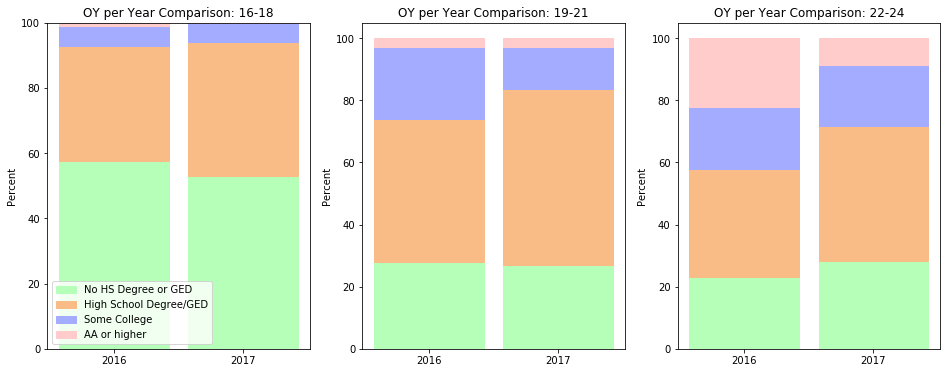

In [307]:
#Data
#green oy_no
#orange oy_yes
#blue working w/o diploma
r = np.arange(2)
raw_data_1 = {'greenBars': [57, second_df.loc['No HS Degree or GED', '16-18 percentage']], 
            'orangeBars': [35, second_df.loc['High School Degree/GED', '16-18 percentage']],
            'blueBars': [6, second_df.loc['Some College','16-18 percentage']],
            'redBars': [1, second_df.loc['AA or higher','16-18 percentage']]
           }

raw_data_2 = {'greenBars': [28, second_df.loc['No HS Degree or GED', '19-21 percentage']], 
            'orangeBars': [46, second_df.loc['High School Degree/GED', '19-21 percentage']],
            'blueBars': [23, second_df.loc['Some College','19-21 percentage']],
            'redBars': [3, second_df.loc['AA or higher','19-21 percentage']]
           }

raw_data_3 = {'greenBars': [23, second_df.loc['No HS Degree or GED', '22-24 percentage']], 
            'orangeBars': [35, second_df.loc['High School Degree/GED', '22-24 percentage']],
            'blueBars': [20, second_df.loc['Some College','22-24 percentage']],
            'redBars': [22, second_df.loc['AA or higher','22-24 percentage']]
           }
                        
raw_data = [raw_data_1, raw_data_2, raw_data_3]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0], ax[1], ax[2] = ax.flatten()

t = ['OY per Year Comparison: 16-18', 'OY per Year Comparison: 19-21', 'OY per Year Comparison: 22-24'];


for data in range(3):
    df = pd.DataFrame(raw_data[data])

#     # # From raw value to percentage
    totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
    redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]

    # plot
    barWidth = 0.85
    names = ('2016','2017')

    # Create green Bars
    p1 = ax[data].bar(r, greenBars, color='#b5ffb9', edgecolor='#b5ffb9', width=barWidth )
    # Create orange Bars
    p2 = ax[data].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='#f9bc86', width=barWidth)
    # Create blue Bars
    p3 = ax[data].bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='#a3acff', width=barWidth)
     # Create red Bars
    p4 = ax[data].bar(r, redBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], color='#ffcccb', edgecolor='#ffcccb', width=barWidth)

  
    # Custom x axis
    ax[data].set_xticks([0,1])
   # ax[data].set_yrange(0,100,10)
    ax[data].set_xticklabels(['2016','2017'])
    ax[data].set_ylabel('Percent')
    ax[data].set_title(t[data])

# Show graphic

ax[0].legend((p1[0], p2[0], p3[0], p4[0]), ('No HS Degree or GED', 'High School Degree/GED', 'Some College', 'AA or higher'), loc='lower left')
plt.show()


## Conclusion

This was such a great project. I had the time of my life. Big props to the author.

For more work, [see here](https://www.espn.com/)

For work I did, [click here](making_a_map.ipynb).

In [1]:
import os
print(os.getcwd())

/Users/karenwarmbein/ds/lectures/opportunity_youth/notebooks
